In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

<ipython-input-39-d82d67def568>:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
df_desharnais = pd.read_csv('/content/drive/MyDrive/02.desharnais.csv',  header=0)
df_desharnais.head()


,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [ ]:
df_desharnais.shape

(81, 13)

In [ ]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [ ]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [ ]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


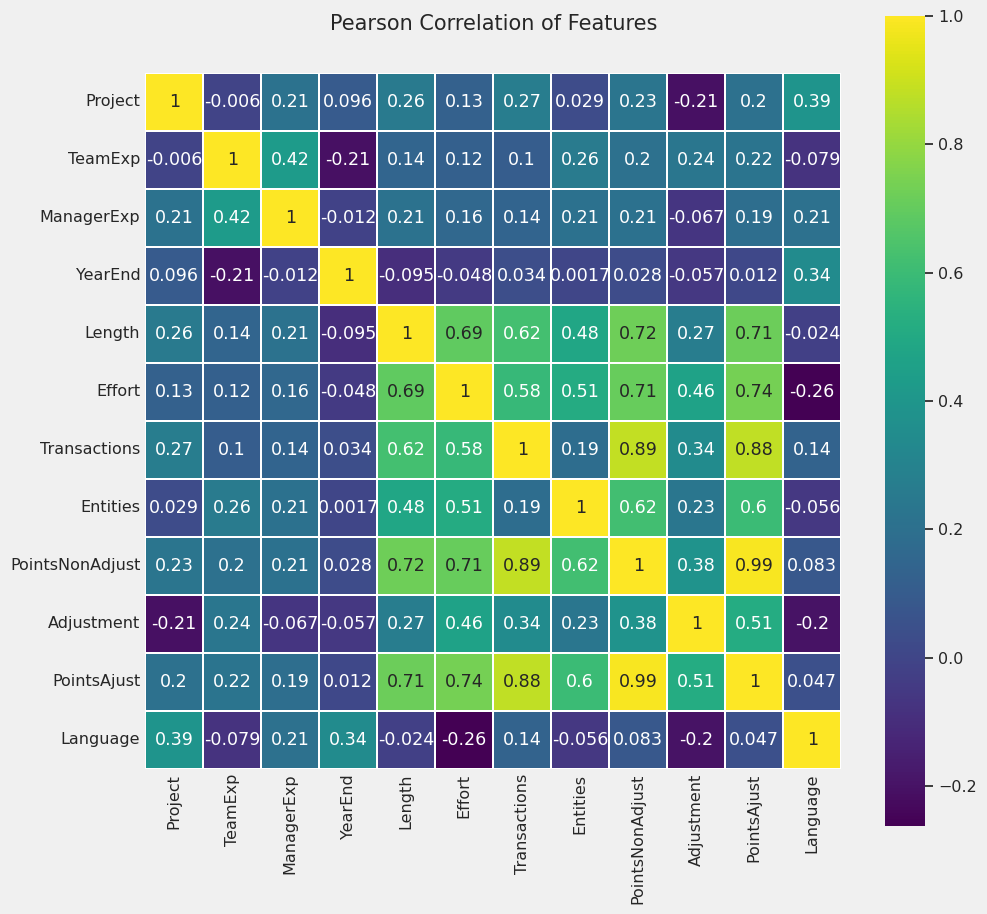

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)

# Atur warna latar belakang menjadi putih
ax = plt.gca()
ax.set_facecolor("white")

sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


In [ ]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in df_desharnais.columns:
    if i == df_desharnais.columns[0]:
      removeOutliers(df_desharnais, i)
    else:
      removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column id is: 40.0
IQR value for column Project is: 40.0
IQR value for column TeamExp is: 3.0
IQR value for column ManagerExp is: 3.0
IQR value for column YearEnd is: 2.0
IQR value for column Length is: 8.0
IQR value for column Effort is: 3398.5
IQR value for column Transactions is: 113.25
IQR value for column Entities is: 74.0
IQR value for column PointsNonAdjust is: 136.0
IQR value for column Adjustment is: 16.0
IQR value for column PointsAjust is: 163.5
IQR value for column Language is: 1.0
Shape of data after outlier removal is:  (63, 13)


In [ ]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [ ]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


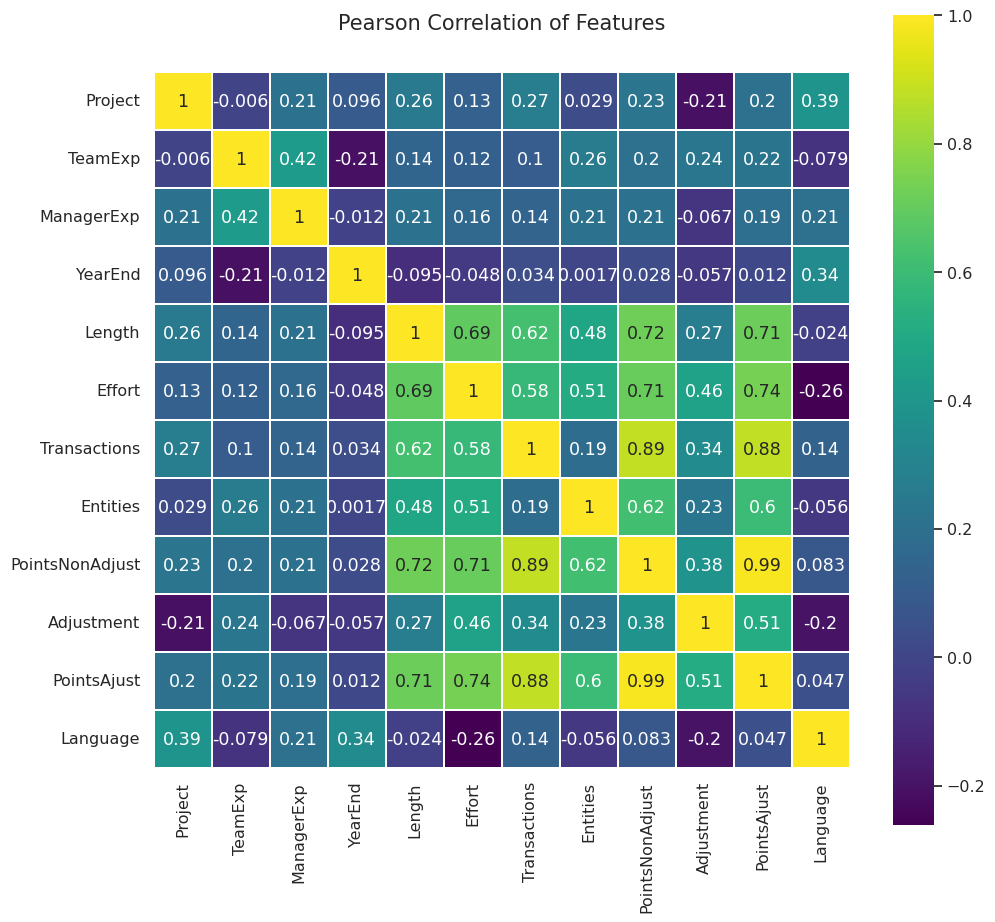

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)

# Atur warna latar belakang menjadi putih
ax = plt.gca()
ax.set_facecolor("white")

sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


In [ ]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

# Inisialisasi model K-Nearest Neighbors Regressor
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)

# Menghitung prediksi
predict = neigh.predict(X_test)

# Menghitung R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r_square_knn = r2_score(y_test, predict)
# Menghitung Mean Square Error (MSE)
mse_knn = mean_squared_error(y_test, predict)*0.000001

# Menghitung Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predict)*0.001

# Menghitung Mean Magnitude of Relative Error (MMRE)
mmre_knn = np.mean((predict - y_test) / y_test)

# Menghitung Median Magnitude of Relative Error (MdMRE)
mdmre_knn = np.median((predict - y_test) / y_test)

# Menghitung Mean Magnitude of Error Relative (MMER)
mmer_knn = (abs(predict - y_test)).mean()*0.001

# Menghitung Prediction Accuracy 25%
acc_25_knn = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Menghitung Prediction Accuracy 50%
acc_50_knn = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

#RMSE
rmse_knn = np.sqrt(mse_knn)

# Menampilkan hasil dalam bentuk persentase
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_knn))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_knn))
print("Root Mean Square (RMSE):",rmse_knn)
print("R-squared (R2):", r_square_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Magnitude of Relative Error (MMRE):", mmre_knn)
print("Median Magnitude of Relative Error (MdMRE):", mdmre_knn)
print("Mean Magnitude of Error Relative (MMER):", mmer_knn )
print("Mean Square Error: ",mse_knn)


# Lakukan K-Fold Cross Validation dan hitung mean score
CV_KNN = np.mean(cross_val_score(neigh, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_KNN))

Prediction Accuracy 25%: 59.26%
Prediction Accuracy 50%: 70.37%
Root Mean Square (RMSE): 1.7551136797388895
R-squared (R2): 0.7379861869550943
Mean Absolute Error (MAE): 1.325814814814815
Mean Magnitude of Relative Error (MMRE): 0.6071301684507143
Median Magnitude of Relative Error (MdMRE): 0.19819819819819828
Mean Magnitude of Error Relative (MMER): 1.325814814814815
Mean Square Error:  3.0804240288065854
Mean Score (Neg MSE) from 10-fold Cross Validation: -15683960.76


Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predict = model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, predict))*0.001
mae_linear = mean_absolute_error(y_test, predict)*0.001
print("Root mean square: ", rmse_linear)
print("Mean Absolute Error: ", mae_linear)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_linear = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_linear = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_linear = model.score(X_test, y_test)

# Mean Magnitude of Relative Error
mmre_linear = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_linear = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_linear = (abs(predict - y_test)).mean()*0.001

# Mean Square Error
mse_linear = mean_squared_error(y_test, predict)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_linear))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_linear))
print("R Square: {:.4f}".format(r_square_linear))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_linear))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_linear))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_linear))
print("Mean Square Error: {:.4f}".format(mse_linear))
# Lakukan K-Fold Cross Validation dan hitung mean score
CV_linear = np.mean(cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_linear))

0.7680074954440715
Root mean square:  2.6801207300488796
Mean Absolute Error:  2.024868889874328
Prediction Accuracy 25%: 37.04%
Prediction Accuracy 50%: 62.96%
R Square: 0.7680
Mean Magnitude of Relative Error: 0.6856
Median Magnitude of Relative Error: 0.3658
Mean Magnitude of Error Relative: 2.0249
Mean Square Error: 7.1830
Mean Score (Neg MSE) from 10-fold Cross Validation: -9919108.51


SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))
predict = LinearSVC.predict(X_test)
rmse_svm =np.sqrt(mean_squared_error(y_test, predict))*0.001
mae_svm = mean_absolute_error(y_test, predict)*0.001
print("Root mean square: ", rmse_svm )
print("Mean Absolute Error: ", mae_svm)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_svm = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_svm = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_svm = r2_score(y_test, predict)

# Mean Magnitude of Relative Error
mmre_svm = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_svm = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_svm = (abs(predict - y_test)).mean()*0.001

# Mean Square Error
mse_svm = mean_squared_error(y_test, predict)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_svm))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_svm))
print("R Square: {:.4f}".format(r_square_svm))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_svm))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_svm))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_svm))
print("Mean Square Error: {:.4f}".format(mse_svm))
# Lakukan K-Fold Cross Validation dan hitung mean score
CV_SVM = np.mean(cross_val_score(LinearSVC, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_SVM))

Best params hash: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.735919788126071
Root mean square:  2.8594684627192417
Mean Absolute Error:  1.9793804631275014
Prediction Accuracy 25%: 44.44%
Prediction Accuracy 50%: 66.67%
R Square: 0.7359
Mean Magnitude of Relative Error: 0.6216
Median Magnitude of Relative Error: 0.3200
Mean Magnitude of Error Relative: 1.9794
Mean Square Error: 8.1766
Mean Score (Neg MSE) from 10-fold Cross Validation: -13024907.54


Bayesian Regression

In [ ]:
# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))*0.001
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)*0.001
print("Bayesian Regression RMSE:", rmse_bayesian)
print("Bayesian Regression MAE:", mae_bayesian)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_bayesian = r2_score(y_test, y_pred_bayesian)

# Mean Magnitude of Relative Error
mmre_bayesian = (abs((y_pred_bayesian - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_bayesian = np.median(abs((y_pred_bayesian - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_bayesian = (abs(y_pred_bayesian - y_test)).mean()*0.001

# Mean Square Error
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_bayesian))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_bayesian))
print("R Square: {:.4f}".format(r_square_bayesian))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_bayesian))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_bayesian))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_bayesian))
print("Mean Square Error: {:.4f}".format(mse_bayesian))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_bayesian = np.mean(cross_val_score(bayesian_model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_bayesian))

Bayesian Regression RMSE: 3.3153737825303007
Bayesian Regression MAE: 2.168045788103078
Prediction Accuracy 25%: 37.04%
Prediction Accuracy 50%: 59.26%
R Square: 0.6450
Mean Magnitude of Relative Error: 0.7020
Median Magnitude of Relative Error: 0.3688
Mean Magnitude of Error Relative: 2.1680
Mean Square Error: 10.9917
Mean Score (Neg MSE) from 10-fold Cross Validation: -11197331.43


Logistic Regression

In [ ]:
# Import pustaka yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

scaler = StandardScaler()
# Melakukan penskalaan pada data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Membuat dan melatih model Regresi Logistik dengan data yang telah discaling
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji yang telah discaling
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Menghitung berbagai metrik kesalahan (error metrics)
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))*0.001
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)*0.001

# Menghitung akurasi prediksi untuk threshold 25% dan 50%
acc_25_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.25) / len(y_test) * 100
acc_50_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.50) / len(y_test) * 100

# Menghitung metrik kesalahan lainnya
r_square_logistic = r2_score(y_test, y_pred_logistic)
mmre_logistic = (abs((y_pred_logistic - y_test) / y_test)).mean()
mdmre_logistic = np.median(abs((y_pred_logistic - y_test) / y_test))
mmer_logistic = (abs(y_pred_logistic - y_test)).mean()*0.001
mse_logistic = mean_squared_error(y_test, y_pred_logistic)*0.000001

# Menampilkan hasil
print("Logistic Regression RMSE:", rmse_logistic)
print("Logistic Regression MAE:", mae_logistic)
print("Prediction Accuracy 25% (Logistic): {:.2f}%".format(acc_25_logistic))
print("Prediction Accuracy 50% (Logistic): {:.2f}%".format(acc_50_logistic))
print("R Square (Logistic): {:.4f}".format(r_square_logistic))
print("Mean Magnitude of Relative Error (Logistic): {:.4f}".format(mmre_logistic))
print("Median Magnitude of Relative Error (Logistic): {:.4f}".format(mdmre_logistic))
print("Mean Magnitude of Error Relative (Logistic): {:.4f}".format(mmer_logistic))
print("Mean Square Error (Logistic): {:.4f}".format(mse_logistic))
# Menggunakan KFold tanpa stratifikasi
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lakukan cross-validation menggunakan KFold
cv_results = cross_val_score(logistic_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Tampilkan mean score
print("Mean Score (Neg MSE) from 5-fold Cross Validation: {:.2f}".format(np.mean(cv_results)))

Logistic Regression RMSE: 4.938603742549702
Logistic Regression MAE: 2.569296296296296
Prediction Accuracy 25% (Logistic): 40.74%
Prediction Accuracy 50% (Logistic): 55.56%
R Square (Logistic): 0.2123
Mean Magnitude of Relative Error (Logistic): 0.6484
Median Magnitude of Relative Error (Logistic): 0.3869
Mean Magnitude of Error Relative (Logistic): 2.5693
Mean Square Error (Logistic): 24.3898


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Score (Neg MSE) from 5-fold Cross Validation: -31486023.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [ ]:
# Random Forest Regression (tanpa PCA) untuk perbandingan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Membuat model Random Forest tanpa PCA
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Mencetak skor model Random Forest tanpa PCA
print("Random Forest Regression Score (without PCA):", rf_model.score(X_test, y_test))

for i in np.arange(100, 1100, 100):
    regressor = RandomForestRegressor(n_estimators=i, max_features=5)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predict))*0.001
    mae_rf = mean_absolute_error(y_test, predict)*0.001

    # 7 Jenis Error Tambahan
    # Prediction Accuracy 25%
    acc_25_rf = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

    # Prediction Accuracy 50%
    acc_50_rf = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

    # R Square
    r_square_rf = r2_score(y_test, predict)

    # Mean Magnitude of Relative Error
    mmre_rf = (abs((predict - y_test) / y_test)).mean()

    # Median Magnitude of Relative Error
    mdmre_rf = np.median(abs((predict - y_test) / y_test))

    # Mean Magnitude of Error Relative
    mmer_rf = (abs(predict - y_test)).mean()*0.001

    # Mean Square Error
    mse_rf = mean_squared_error(y_test, predict)*0.000001

    print(f"Random Forest with {i} Estimators")
    print("Root Mean Square Error:", rmse_rf)
    print("Mean Absolute Error:", mae_rf)
    print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_rf))
    print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_rf))
    print("R Square: {:.4f}".format(r_square_rf))
    print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_rf))
    print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_rf))
    print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_rf))
    print("Mean Square Error: {:.4f}".format(mse_rf))
    print("\n")
    # Lakukan K-Fold Cross Validation dan hitung mean score
    CV_RF = np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error'))

    # Tampilkan mean score
    print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_RF))

Random Forest Regression Score (without PCA): 0.42340972399062327
Random Forest with 100 Estimators
Root Mean Square Error: 4.339302400698459
Mean Absolute Error: 2.533193703703704
Prediction Accuracy 25%: 33.33%
Prediction Accuracy 50%: 55.56%
R Square: 0.3919
Mean Magnitude of Relative Error: 0.7389
Median Magnitude of Relative Error: 0.4514
Mean Magnitude of Error Relative: 2.5332
Mean Square Error: 18.8295


Mean Score (Neg MSE) from 10-fold Cross Validation: -13376718.26
Random Forest with 200 Estimators
Root Mean Square Error: 4.199976466651111
Mean Absolute Error: 2.509242777777778
Prediction Accuracy 25%: 33.33%
Prediction Accuracy 50%: 62.96%
R Square: 0.4303
Mean Magnitude of Relative Error: 0.7393
Median Magnitude of Relative Error: 0.4609
Mean Magnitude of Error Relative: 2.5092
Mean Square Error: 17.6398


Mean Score (Neg MSE) from 10-fold Cross Validation: -13001672.72
Random Forest with 300 Estimators
Root Mean Square Error: 4.219227203686035
Mean Absolute Error: 2.42392

Visualisasikan

Perbandingan Prediksi Akurasi 25% & 50%

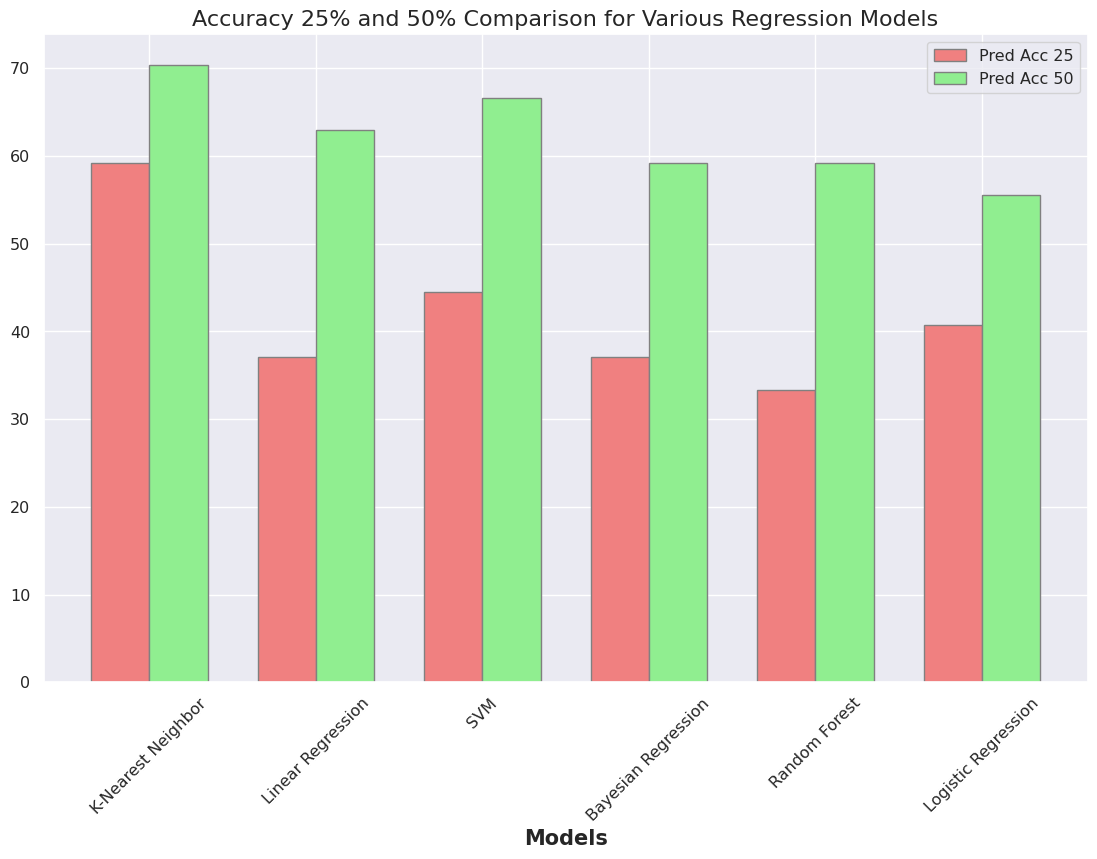

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk prediksi accuracy 25%
acc_25_values = [acc_25_knn, acc_25_linear, acc_25_svm, acc_25_bayesian, acc_25_rf, acc_25_logistic]

# Data untuk prediksi accuracy 50%
acc_50_values = [acc_50_knn, acc_50_linear, acc_50_svm, acc_50_bayesian, acc_50_rf, acc_50_logistic]

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat posisi untuk grup bar
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))

# Plot untuk accuracy 25%
plt.bar(r1, acc_25_values, color='lightcoral', width=bar_width, edgecolor='grey', label='Pred Acc 25')

# Plot untuk accuracy 50%
plt.bar(r2, acc_50_values, color='lightgreen', width=bar_width, edgecolor='grey', label='Pred Acc 50')

# Atur label dan judul
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.title('Accuracy 25% and 50% Comparison for Various Regression Models', fontsize=16)
plt.legend()

# Tampilkan grafik
plt.show()


Perbandingan Mean Square Error (MSE)

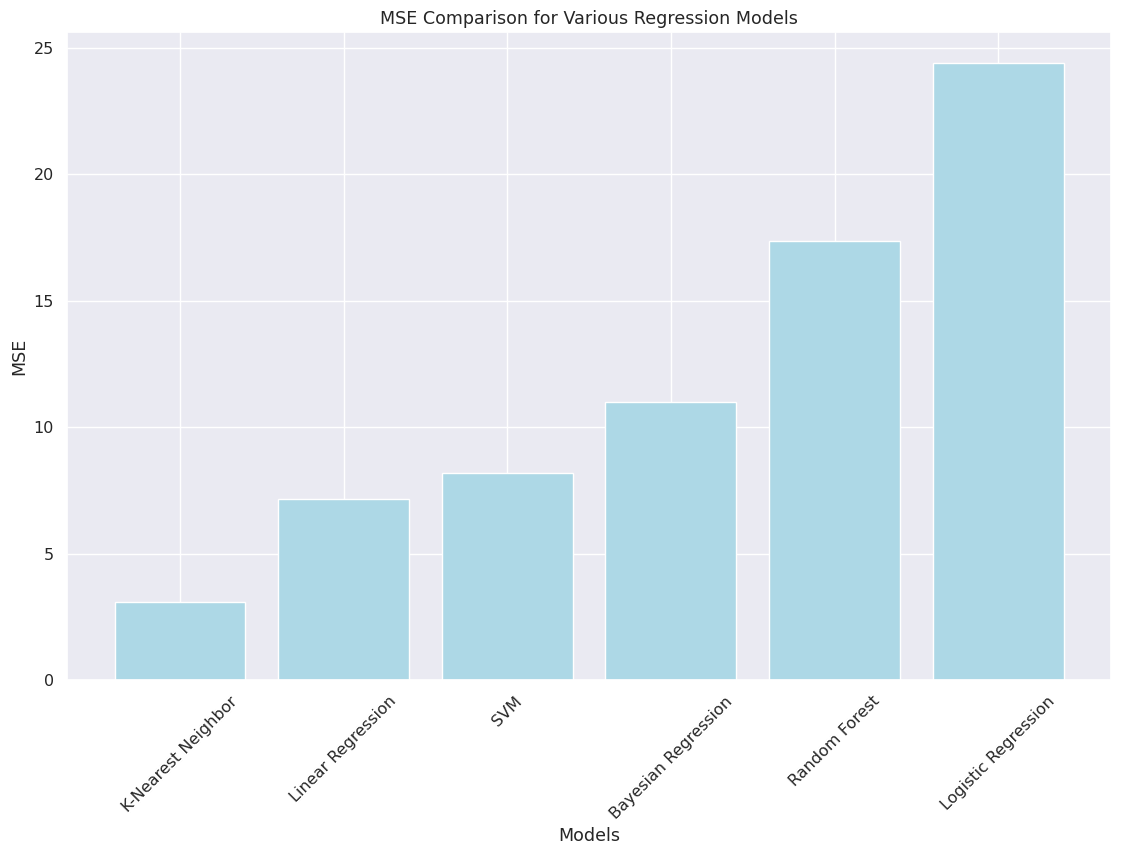

In [ ]:
import matplotlib.pyplot as plt

# Hitung MSE untuk berbagai model
mse_values = []


mse_values.append(mse_knn)
mse_values.append(mse_linear)
mse_values.append(mse_svm)
mse_values.append(mse_bayesian)
mse_values.append(mse_rf)
mse_values.append(mse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mse_values, color='lightblue')
plt.title('MSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


Perbandingan Root Mean Square Error (RMSE)

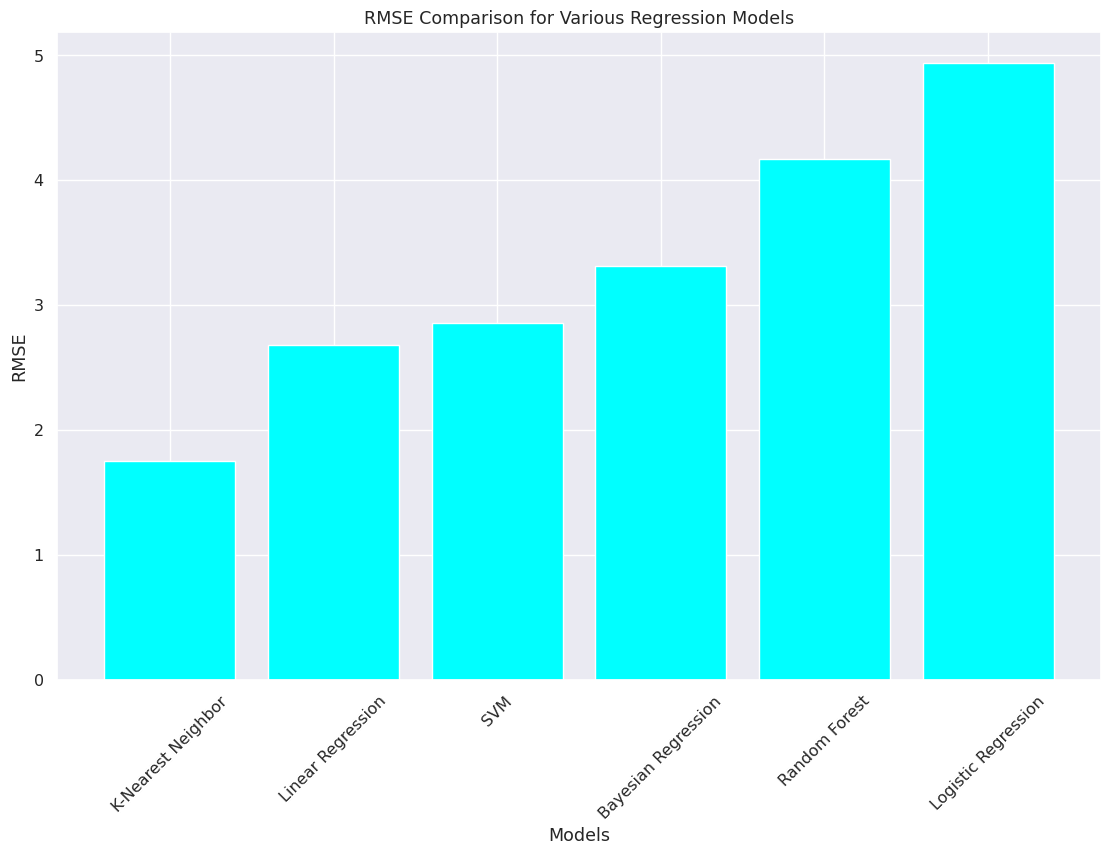

In [ ]:
import matplotlib.pyplot as plt

# Hitung RMSE untuk berbagai model
rmse_values = []


rmse_values.append(rmse_knn)
rmse_values.append(rmse_linear)
rmse_values.append(rmse_svm)
rmse_values.append(rmse_bayesian)
rmse_values.append(rmse_rf)
rmse_values.append(rmse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color='cyan')
plt.title('RMSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


Perhitungan Mean Absolute Error (MAE)

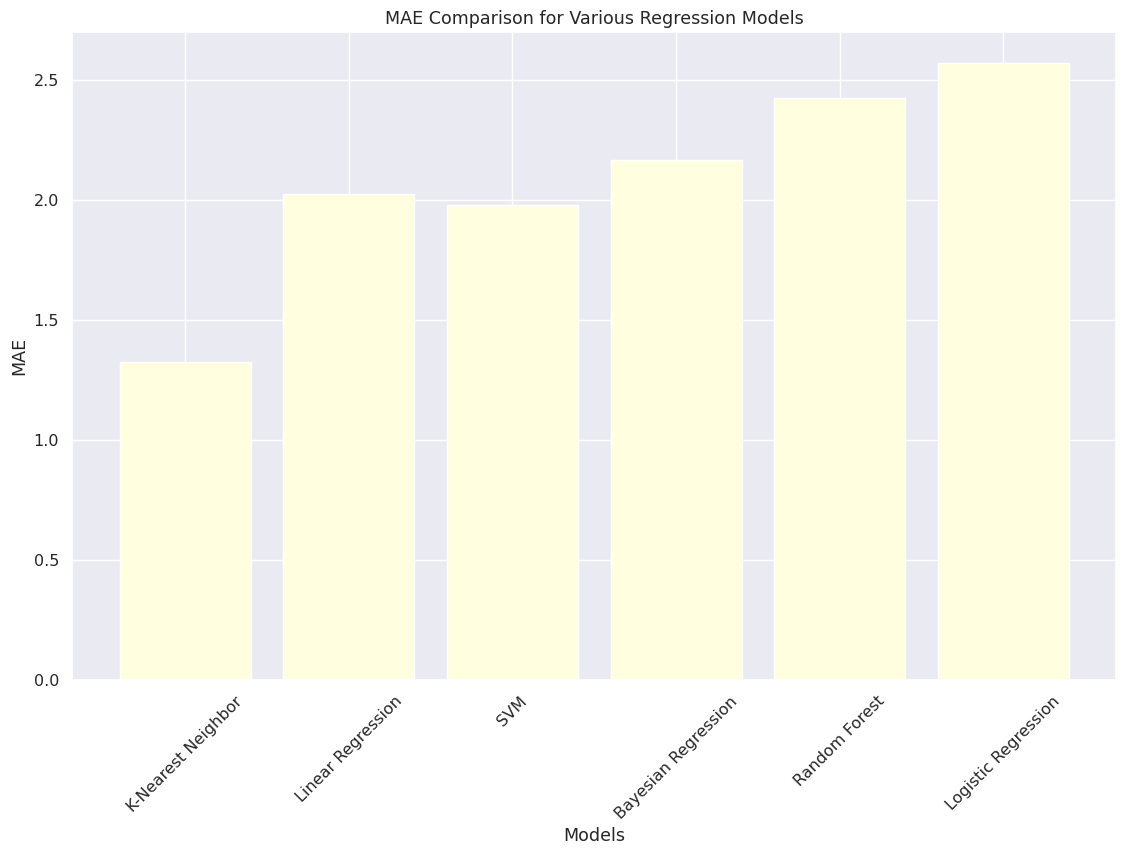

In [ ]:
import matplotlib.pyplot as plt

# Hitung MAE untuk berbagai model
mae_values = []

mae_values.append(mae_knn)
mae_values.append(mae_linear)
mae_values.append(mae_svm)
mae_values.append(mae_bayesian)
mae_values.append(mae_rf)
mae_values.append(mae_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mae_values, color='lightyellow')
plt.title('MAE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


Perbandingan R Square

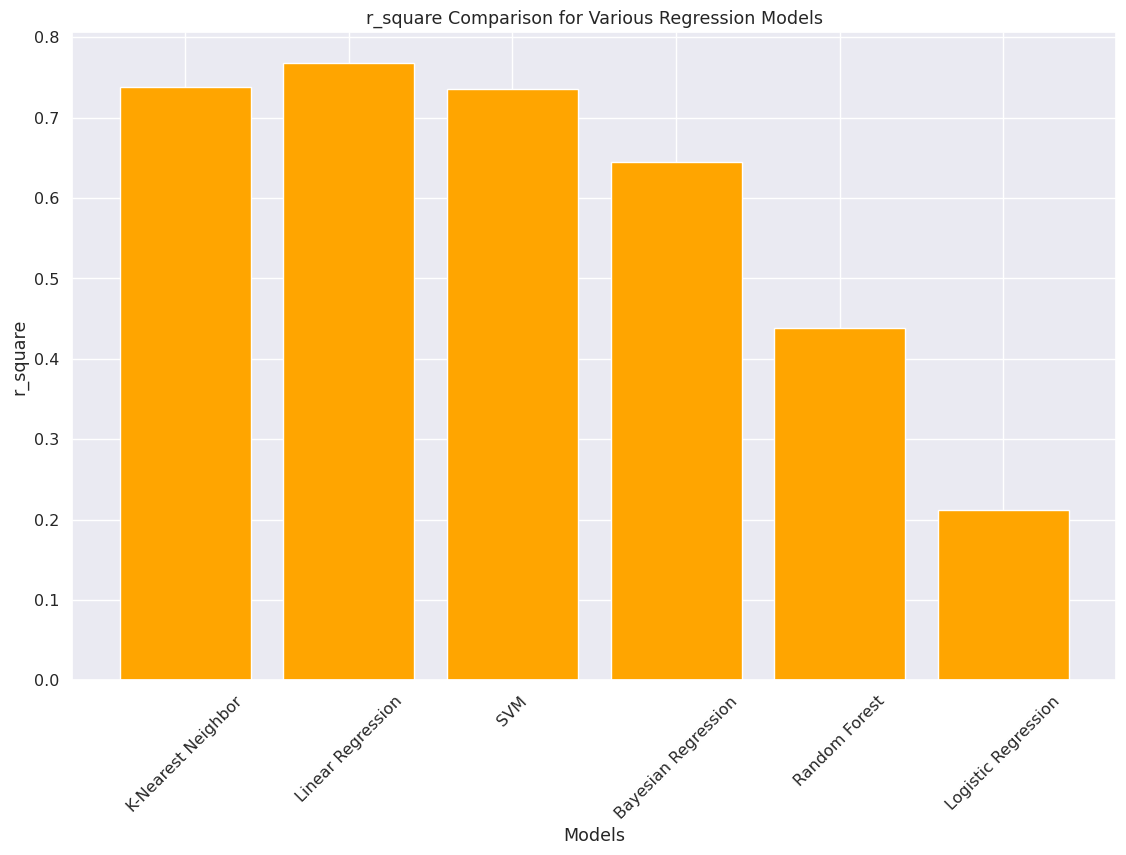

In [ ]:
import matplotlib.pyplot as plt

# Hitung r square untuk berbagai model
r_square_values = []


r_square_values.append(r_square_knn)
r_square_values.append(r_square_linear)
r_square_values.append(r_square_svm)
r_square_values.append(r_square_bayesian)
r_square_values.append(r_square_rf)
r_square_values.append(r_square_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, r_square_values, color='orange')
plt.title('r_square Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('r_square')
plt.xticks(rotation=45)
plt.show()


Perbandingan Mean Magnitude of Relative Error (MMRE)

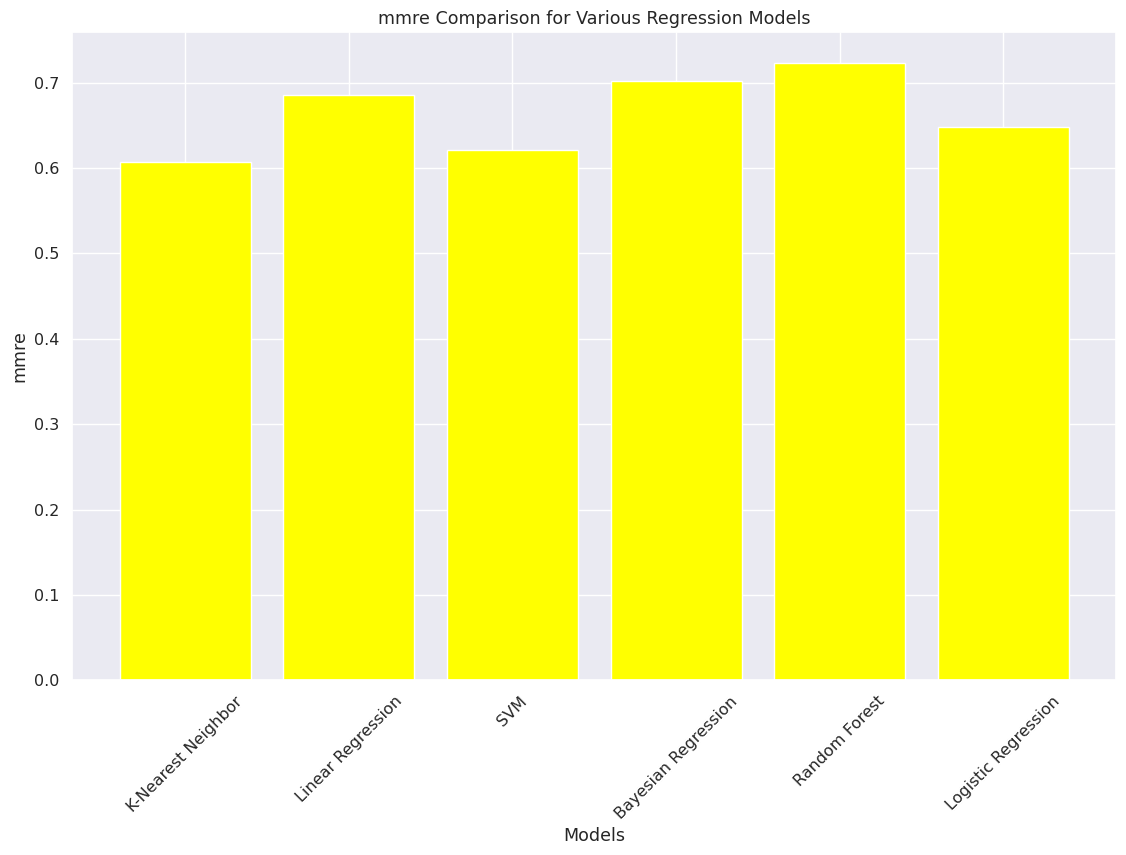

In [ ]:
import matplotlib.pyplot as plt

# Hitung mmre untuk berbagai model
mmre_values = []


mmre_values.append(mmre_knn)
mmre_values.append(mmre_linear)
mmre_values.append(mmre_svm)
mmre_values.append(mmre_bayesian)
mmre_values.append(mmre_rf)
mmre_values.append(mmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmre_values, color='yellow')
plt.title('mmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Relative Error (mdmre)

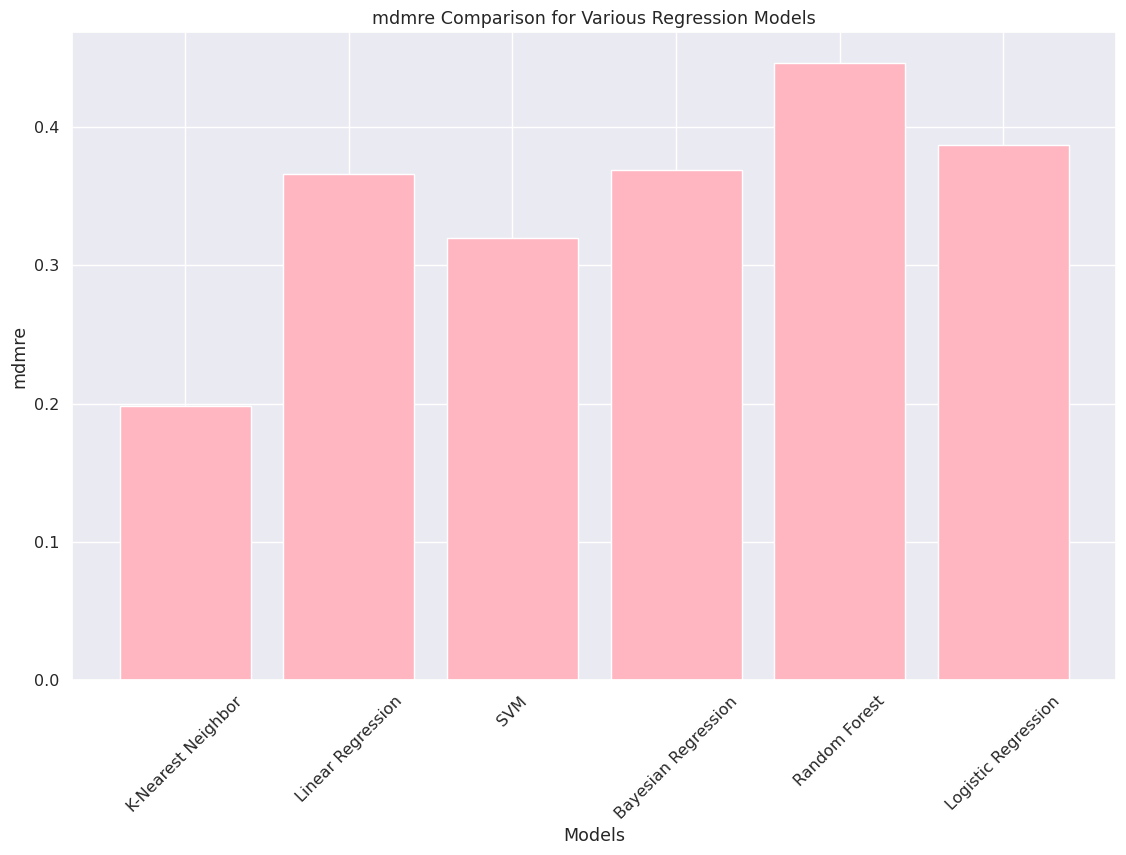

In [ ]:
import matplotlib.pyplot as plt

# Hitung mdmre untuk berbagai model
mdmre_values = []


mdmre_values.append(mdmre_knn)
mdmre_values.append(mdmre_linear)
mdmre_values.append(mdmre_svm)
mdmre_values.append(mdmre_bayesian)
mdmre_values.append(mdmre_rf)
mdmre_values.append(mdmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mdmre_values, color='lightpink')
plt.title('mdmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mdmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Error Relative (MMER)

1.325814814814815


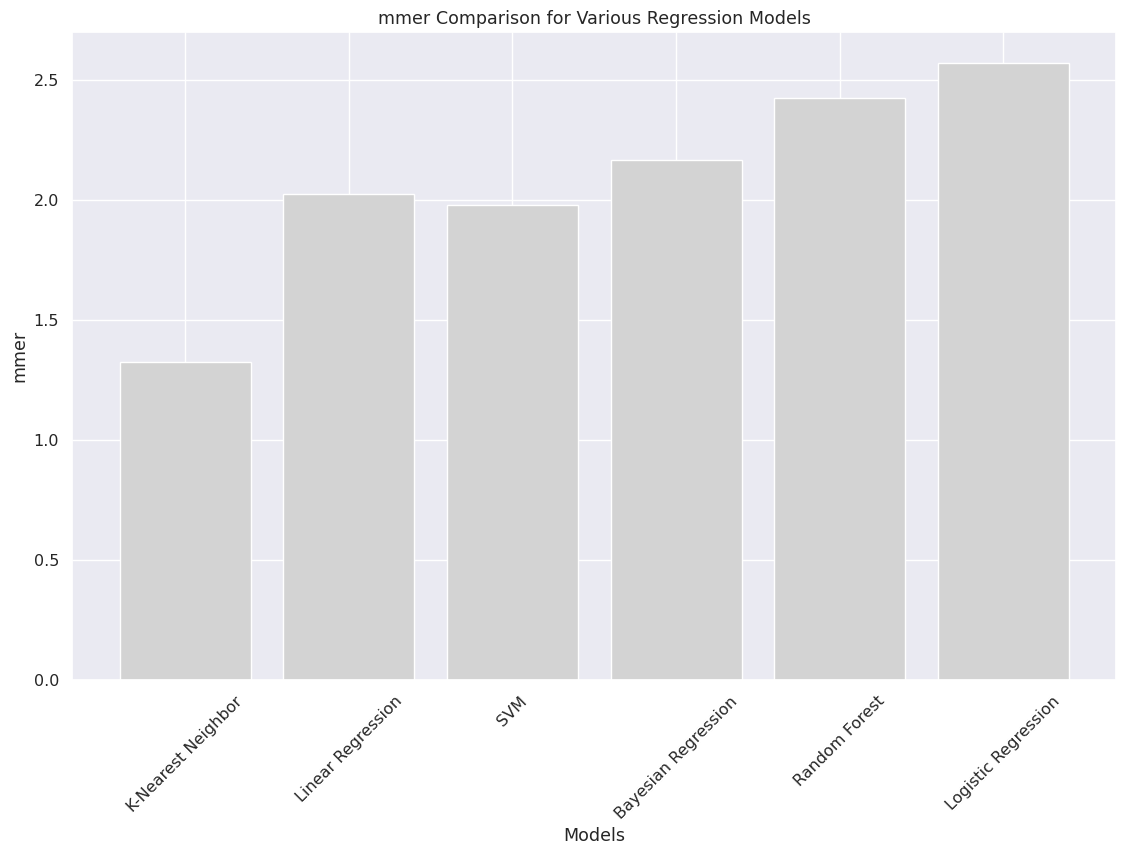

In [ ]:
import matplotlib.pyplot as plt

# Hitung mdmre untuk berbagai model
mmer_values = []

mmer_values.append(mmer_knn)
mmer_values.append(mmer_linear)
mmer_values.append(mmer_svm)
mmer_values.append(mmer_bayesian)
mmer_values.append(mmer_rf)
mmer_values.append(mmer_logistic)

print(mmer_knn)
# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmer_values, color='lightgrey')
plt.title('mmer Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmer')
plt.xticks(rotation=45)
plt.show()
